In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Declare a mesh
l = 0.1
N = 1000
L = (N-1)*l
x = np.linspace(0, L, N)
# plt.figure(figsize=(12,10))
# plt.plot(x, np.ones(N),'-o')

In [2]:
def cal_potential_energy(chain):
    re = 0.0
    n = chain.size
    for i in range(0, n-1):
        temp = chain[i] - chain[i+1] - l
        re += temp**2 - alpha*(temp**3) + 0.1*(temp**4)
        
    return re

In [3]:
def cal_kinetic_energy(vel):
    results = 0.0
    for vi in vel:
        results += 0.5*m*(vi**2)
    return results

In [4]:
def cal_total_energy(chain, vel):
    return cal_potential_energy(chain) + cal_kinetic_energy(vel)

In [5]:
# Now we need to verlet every particle:
T = 100
dt = 0.1
num_iter = int(T/dt)
t = 0.0
m = 1.0
alpha = 0.0
kB = 1.0
Temp = 1.0 # Kelvin

# Initialise of v
v = np.zeros(N)

In [6]:
print cal_total_energy(x, v)
print cal_kinetic_energy(v)
print cal_potential_energy(x)

40.11984
0.0
40.11984


In [7]:
a = np.zeros(N)
net_length = []
potential_energy = []
kinetic_energy = []
total_energy = []
v_mean = []

for it in range(num_iter):
    if it==0:    
        # Create a storage
        x_store = x.copy()
    else:
        # Create a storage
        x_store = np.vstack((x_store, x))    
        
    # Let's propose random move, by drawing samples from a distribution
    x_propose = np.random.normal(x, 0.01, N)
#     print x
#     print x_propose
    v_propose = (1.0/dt)*(x_propose - x)
    
    # Calculate the change in energy
    delta_pe = cal_potential_energy(x_propose) - cal_potential_energy(x)
    delta_ke = cal_kinetic_energy(v_propose) - cal_kinetic_energy(v)
    delta_e = np.abs(delta_pe + delta_ke)

    # Now calculate probability of accepting
    prob = np.min(1.0, np.exp(-delta_e/(kB*Temp)))
    u = np.random.uniform(0.0, 1.0)
    if (u<prob):
        x = x_propose
        v = v_propose
    
    # Create a storage
    net_length.append((np.max(x)-np.min(x))/L)
    potential_energy.append(cal_potential_energy(x))
    kinetic_energy.append(cal_kinetic_energy(v))
    total_energy.append(cal_total_energy(x, v))

1.0025428742


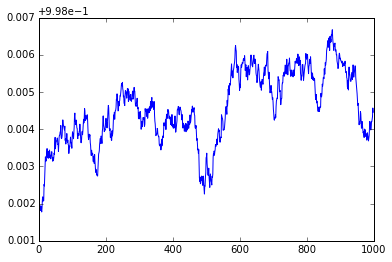

In [8]:
plt.plot(net_length)
print np.mean(net_length)

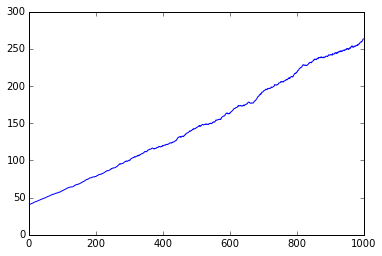

In [9]:
plt.plot(potential_energy)

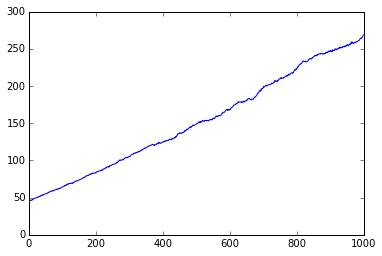

In [10]:
plt.plot(total_energy)

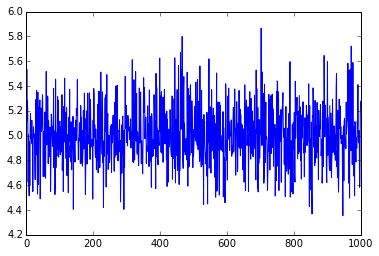

In [11]:
plt.plot(kinetic_energy)

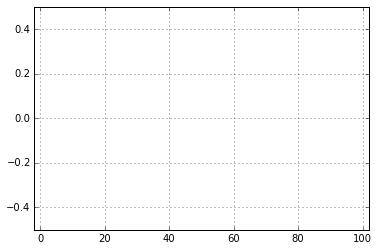

In [12]:
from JSAnimation.IPython_display import display_animation
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2.0, L+2.0), ylim=(-0.5, 0.5))
ax.grid()
scat = ax.scatter([], [], s=50)
line, = ax.plot([], [], lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
color_data = np.linspace(0, N, N)

def animate(i, color_data, scat, line):
    x = x_store[i]
    y = np.zeros(x.size)
    line.set_data(x, y)
    array = np.vstack((x, y))
    scat.set_offsets(array.transpose())
    scat.set_array(color_data)
    time_text.set_text(time_template%(i*dt))
    return line, scat, time_text

def init():
    line.set_data([], [])
    scat = ax.scatter([], [], s=50)
    time_text.set_text('')
    return line, scat, time_text

anim = animation.FuncAnimation(fig, animate, frames=xrange(num_iter),
                              fargs=(color_data, scat, line), blit=False, init_func=init)
    
# Call animation function to display the animation
# display_animation(anim)

In [13]:
print x_store[-1]

[ -2.90177188e-01   1.02646274e-02   5.41085604e-01   6.71005121e-01
   2.19895875e-01   8.64090252e-01   6.00327691e-01   9.03009232e-01
   7.36002547e-01   8.11858611e-01   5.43941497e-01   6.94734188e-01
   1.16507525e+00   1.33837694e+00   1.58254149e+00   8.50586939e-01
   1.21514423e+00   2.20503617e+00   1.28934666e+00   2.09167705e+00
   1.69336829e+00   2.13737760e+00   2.24580389e+00   2.25007337e+00
   2.37727057e+00   2.31589292e+00   3.02280159e+00   2.36104941e+00
   3.08220891e+00   3.00030064e+00   2.36778144e+00   3.24020571e+00
   2.92346682e+00   3.23771884e+00   3.44730910e+00   3.09481332e+00
   3.84141903e+00   3.80935173e+00   3.79198833e+00   3.65060155e+00
   3.90709778e+00   4.35645783e+00   4.53030547e+00   3.93229580e+00
   4.68681471e+00   4.50298888e+00   4.50862021e+00   4.45870955e+00
   4.68284078e+00   4.82093677e+00   4.38715293e+00   5.41049991e+00
   4.89096266e+00   5.30057678e+00   5.48294303e+00   5.24371766e+00
   5.78427401e+00   5.56448114e+00

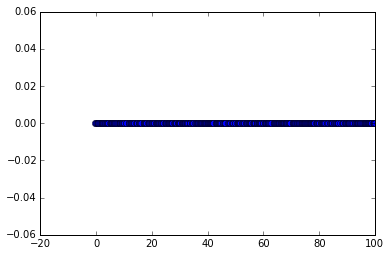

In [14]:
plt.plot(x_store[-1], np.zeros(x_store[-1].size), '-o')